<h2 align=center>Exploratory Data Analysis With Python and Pandas</h2>
<h2 align=center>CUSTOMER ANALYSIS</h2>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

### Task 2: Univariate & Multivariate Analysis: CUSTOMER

In [41]:
df = pd.read_csv('DataCoSupplyChainDataset.csv',encoding= 'unicode_escape')

In [43]:
pd.set_option('display.max_columns', None)

In [42]:
df_cust = df[['Customer Id','Customer Fname','Customer Lname', 'Customer City', 'Customer Country', 'Customer Zipcode',
    'Customer Email',  'Customer Password', 'Customer Segment','Order Customer Id','Sales per customer','Customer State','Customer Street']]
#Sales per customer: Money received from the sale (discount not included)
df_cust.sort_values('Customer Id')

,Customer Id,Customer Fname,Customer Lname,Customer City,Customer Country,Customer Zipcode,Customer Email,Customer Password,Customer Segment,Order Customer Id,Sales per customer,Customer State,Customer Street
9138,1,Richard,Hernandez,Brownsville,EE. UU.,78521.0,XXXXXXXXX,XXXXXXXXX,Consumer,1,472.450012,TX,6303 Heather Plaza
94974,2,Mary,Barrett,Littleton,EE. UU.,80126.0,XXXXXXXXX,XXXXXXXXX,Consumer,2,40.000000,CO,9526 Noble Embers Ridge
95017,2,Mary,Barrett,Littleton,EE. UU.,80126.0,XXXXXXXXX,XXXXXXXXX,Consumer,2,290.980011,CO,9526 Noble Embers Ridge
106166,2,Mary,Barrett,Littleton,EE. UU.,80126.0,XXXXXXXXX,XXXXXXXXX,Consumer,2,142.440002,CO,9526 Noble Embers Ridge
106167,2,Mary,Barrett,Littleton,EE. UU.,80126.0,XXXXXXXXX,XXXXXXXXX,Consumer,2,83.970001,CO,9526 Noble Embers Ridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
160537,20753,Chava,Velez,Caguas,Puerto Rico,725.0,XXXXXXXXX,XXXXXXXXX,Consumer,20753,161.869995,PR,9861 Grand Elk Trace
93905,20754,Stacey,Weber,Plainfield,EE. UU.,60544.0,XXXXXXXXX,XXXXXXXXX,Consumer,20754,172.660004,IL,5919 Hidden Anchor Port
0,20755,Cally,Holloway,Caguas,Puerto Rico,725.0,XXXXXXXXX,XXXXXXXXX,Consumer,20755,314.640015,PR,5365 Noble Nectar Island
52147,20756,Cherokee,Callahan,Berwyn,EE. UU.,60402.0,XXXXXXXXX,XXXXXXXXX,Corporate,20756,10.910000,IL,3312 Harvest Horse Chase


Customer City: City where the purchase was made
Customer Country: Country where the purchase was made

### a) CUSTOMERS

##### How many customers does the company have?

In [24]:
df['Customer Id'].nunique()

20652

##### Do the customers buy only 1 type of product or many? (historically)

In [4]:
# How many unique products does each customer purchase (Allways buy same product, or differents)
df_idprod = df.groupby('Customer Id').nunique()['Product Card Id'].to_frame(name='Num. diff. products')
#df_idprod.columns = df_idprod.columns.str.replace('Product Card Id','Num. diff. products')

# How much profit did the company received from each customer historically 
df_namesales =  round(df.groupby('Customer Id').sum()['Order Profit Per Order'].to_frame(name='Total Profit per customer'),2)
#df_namesales = df_namesales.columns.str.replace('Order Profit Per Order','Total Profit per customer')

# Which are the name and last name of each Customer Id
df_idname = df[['Customer Id','Customer Fname','Customer Lname']].drop_duplicates(subset='Customer Id').set_index('Customer Id')

# Join the 3 dataframes
df_custprof_prod = pd.concat([df_idname,df_idprod,df_namesales], axis=1)
df_custprof_prod = df_custprof_prod[df_custprof_prod['Total Profit per customer'] > 0 ]
df_custprof_prod

,Customer Fname,Customer Lname,Num. diff. products,Total Profit per customer
Customer Id,,,,
1,Richard,Hernandez,1,159.69
2,Mary,Barrett,7,208.74
3,Ann,Smith,9,334.49
5,Robert,Hudson,5,309.85
6,Mary,Smith,8,893.65
...,...,...,...,...
20751,Shelley,Irwin,1,70.51
20752,Lee,Glover,1,103.59
20755,Cally,Holloway,1,91.25


In [5]:
# Percentage of different products purchased per client (historically)
df_custprof_prod['Num. diff. products'].value_counts(normalize=True)

1     0.412039
8     0.092801
9     0.084876
7     0.083182
6     0.071627
10    0.066606
5     0.050091
11    0.039443
4     0.034785
3     0.020448
12    0.018935
2     0.012462
13    0.008227
14    0.002843
15    0.001089
16    0.000302
17    0.000242
Name: Num. diff. products, dtype: float64

##### Which of both options (buy 1 product or different products) bring more profit to the company?

In [51]:
df_custprof_prod.groupby(['Num. diff. products']).agg(['median','mean','sum'])

Total Profit per customer                        
                                       median         mean        sum
Num. diff. products                                                  
1                                      50.180    78.738715  536289.39
2                                      98.510   120.370097   24796.24
3                                     174.495   185.223254   62605.46
4                                     230.010   241.797652  139033.65
5                                     273.410   290.554855  240579.42
6                                     337.815   357.558429  423349.18
7                                     410.870   439.142458  603820.88
8                                     464.530   486.477438  746256.39
9                                     534.350   559.867833  785494.57
10                                    578.960   607.486267  668842.38
11                                    634.330   661.699709  431428.21
12                                    708.480   708.280703  221691.86
13                                    747.170   751.215147  102165.26
14                                    706.240   762.624681   35843.36
15                                    866.350   848.094444   15265.70
16                                   1054.700   991.116000    4955.58
17                                   1092.565  1196.290000    4785.16

Text(0.5, 1.0, 'Distribution of profit per number of different products the customer purchased historically (in USD)')

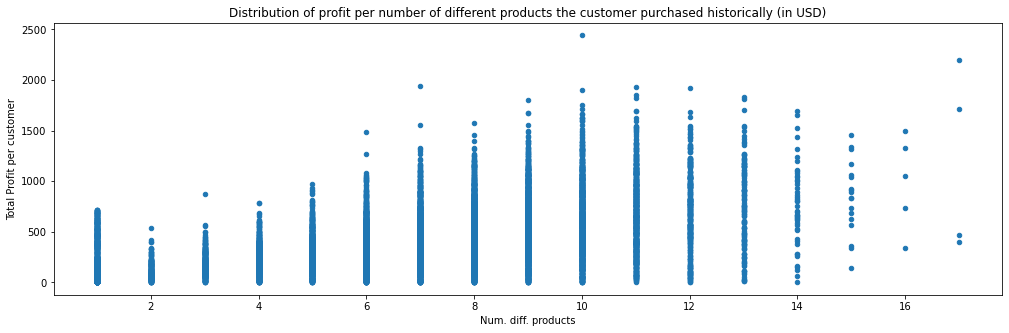

In [53]:
# Scatter plot
df_custprof_prod.plot(x='Num. diff. products', y="Total Profit per customer", kind="scatter",figsize=(17,5))
plt.title('Distribution of profit per number of different products the customer purchased historically (in USD)')

Text(0.5, 0, 'Variety of products per customer (Number of different products the customer bought historically)')

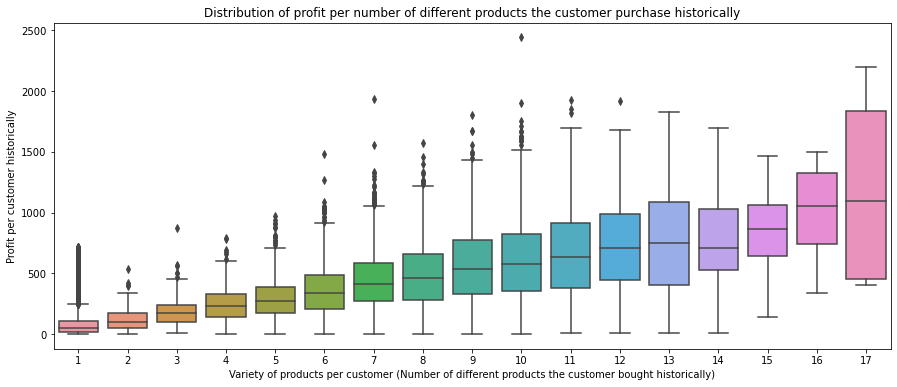

In [52]:
# To analize better the previous distribution we'll use a boxplot. 
# It will help us to see the outliers and the IQR - Interquartile Range (difference between the 75th and 25th percentiles) 

fig, ax = plt.subplots(figsize=(15,6))
sns.boxplot(x=df_custprof_prod['Num. diff. products'], y=df_custprof_prod['Total Profit per customer'])
ax.set_title('Distribution of profit per number of different products the customer purchase historically')
ax.set_ylabel('Profit per customer historically')
ax.set_xlabel('Variety of products per customer (Number of different products the customer bought historically)')

##### Which is the number of different products purchased historically per client that bring the highest profit to the company?

In [6]:
df_unitstotprof = df_custprof_prod.groupby(['Num. diff. products']).agg(['sum'])['Total Profit per customer'].sort_values(by='sum', ascending=False)
df_unitstotprof.columns = df_unitstotprof.columns.str.replace('sum','Total profit historically')
df_unitstotprof

,Total profit historically
Num. diff. products,
9,785494.57
8,746256.39
10,668842.38
7,603820.88
1,536289.39
11,431428.21
6,423349.18
5,240579.42
12,221691.86


Text(0.5, 0, 'Number of different products the customer bought historically')

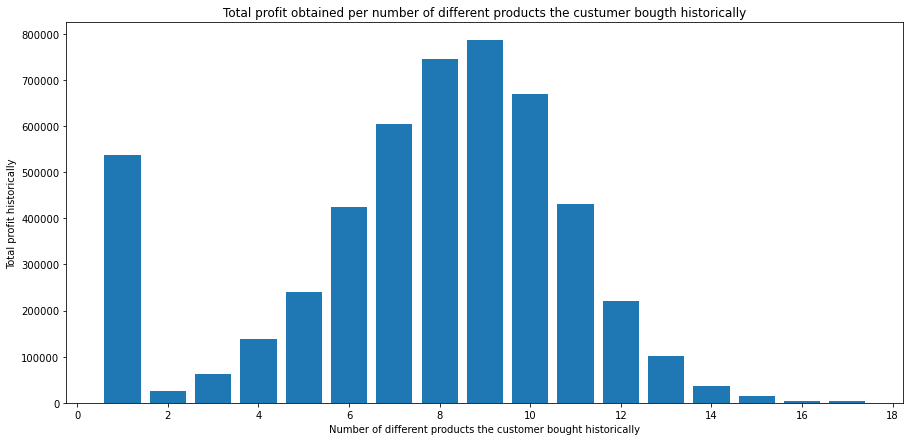

In [29]:
ax = plt.figure(figsize=(15,7)).gca()
plt.bar(df_unitstotprof.index, df_unitstotprof['Total profit historically'])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_title('Total profit obtained per number of different products the custumer bougth historically')
ax.set_ylabel('Total profit historically')
ax.set_xlabel('Number of different products the customer bought historically')

#### b) GEOGRAPHICAL LOCATION

##### Which are the main countries where the purchases are made?

In [30]:
df['Customer Country'].value_counts(normalize=True)

EE. UU.        0.615703
Puerto Rico    0.384297
Name: Customer Country, dtype: float64

##### Which are the main states where the purchases are made?

In [26]:
df['Customer State'].value_counts()

PR       69373
CA       29223
NY       11327
TX        9103
IL        7631
FL        5456
OH        4095
PA        3824
MI        3804
NJ        3191
AZ        3026
GA        2503
MD        2415
NC        1992
CO        1914
VA        1849
OR        1668
MA        1607
TN        1582
NV        1440
MO        1354
HI        1248
CT        1094
UT         968
NM         949
LA         948
WA         920
WI         850
MN         672
SC         665
IN         581
DC         579
KY         487
KS         458
DE         269
RI         243
WV         241
OK         232
ND         215
ID         167
AR         164
MT          87
IA          67
AL          35
95758        2
91732        1
Name: Customer State, dtype: int64

##### Which are the main cities where the purchases are made?

In [27]:
df['Customer City'].value_counts()

Caguas         66770
Chicago         3885
Los Angeles     3417
Brooklyn        3412
New York        1816
               ...  
Bartlett          25
Malden            22
Ponce             22
Freehold          13
CA                 3
Name: Customer City, Length: 563, dtype: int64

##### Which are the main cities where the purchases are made in sales (in USD)?

In [47]:
# Create a df with multiindex with country, city, and the # of sales & order it in descending order
df_cocit = df.groupby(['Customer Country', 'Customer City']).sum().sort_values(['Customer Country','Sales'], ascending=[True,False])['Sales'].map('{:,.2f}'.format)

# The result is a serie, pass it to a df
df_cocit = df_cocit.to_frame()

# Groupby by Country (level 0 of the index) and show the first 10 results
df_cocit.groupby(level=0).head(10)

Sales
Customer Country Customer City               
EE. UU.          Chicago           797,614.21
                 Los Angeles       697,887.42
                 Brooklyn          676,419.78
                 New York          361,217.10
                 Philadelphia      315,705.51
                 Bronx             308,905.01
                 San Diego         293,830.52
                 Miami             270,368.20
                 Houston           267,347.92
                 Las Vegas         241,702.71
Puerto Rico      Caguas         13,610,266.21
                 San Juan           68,421.53
                 Bayamon            58,949.60
                 Humacao            45,851.61
                 Manati             32,837.16
                 Carolina           32,442.15
                 Vega Baja          28,856.20
                 Rio Grande         28,603.42
                 San Sebastian      28,094.03
                 Mayaguez           26,738.44

##### Which are the main states where the purchases are made in sales (in USD)?

In [46]:
df_stacit = df.groupby(['Customer Country', 'Customer State']).sum().sort_values(['Customer Country','Sales'], ascending=[True,False])['Sales'].map('{:,.2f}'.format)
df_stacit = df_stacit.to_frame()
df_stacit.groupby(level=0).head(10)

Sales
Customer Country Customer State               
EE. UU.          CA               5,929,034.02
                 NY               2,301,325.15
                 TX               1,869,746.10
                 IL               1,561,644.53
                 FL               1,110,758.41
                 OH                 833,180.86
                 MI                 782,401.32
                 PA                 772,199.01
                 NJ                 654,152.54
                 AZ                 611,973.38
Puerto Rico      PR              14,150,241.77

### c) SEGMENTS

##### Which are the main segments?

In [31]:
df['Customer Segment'].value_counts(normalize= True)

Consumer       0.517973
Corporate      0.303508
Home Office    0.178519
Name: Customer Segment, dtype: float64

##### Which is the main segment per country? (in amount of orders)

In [56]:
df.groupby(['Customer Country','Customer Segment']).count()['Type']

Customer Country  Customer Segment
EE. UU.           Consumer            57830
                  Corporate           33993
                  Home Office         19323
Puerto Rico       Consumer            35674
                  Corporate           20796
                  Home Office         12903
Name: Type, dtype: int64

##### Which is the segment with more profit? (per country)

In [38]:
df_segprof = df[df['Order Profit Per Order'] > 0]
df_segprof = df_segprof.groupby(['Customer Country','Customer Segment']).sum()['Order Profit Per Order'].to_frame(name='Total Profit')
df_segprof.astype('int64').style.format('{:,}')

##### CONCLUSION:

a) Customers

* The company has 20,652 registered customers.

* 40% of the times the customers purchase one single type of product, and 60% they purchase more than one different product (from 2 units till 17 products per purchase).

* Clients who buy more than one different product tend to bring more revenue to the company. Nonetheless, the distribution of profit is similar if the buy 1, 2 or 3 different products. 

* Historically the biggest profit has been received by clients who buy a lot of different products, mainly 9, 8 and 10 different products.

b) Geographical location

* The customers are from two countries: 61,6% USA and 38,4% Puerto Rico. 

* The main states from where the purchases were made are PR (Puerto Rico), CA (California) and NY (New York).

* The main cities where the purchases were made are Caguas (Puerto Rico), Chicago (USA) and Los Angeles (USA).

* The cities where the purchases were made that brought more sales (in USD) are: Chicago, Los Angeles and Brooklyn in USA, and Caguas in Puerto Rico.   

* The main states where the purchases were made in sales (in USD) are: PR in Puerto Rico, and CA (California), NY (New York) and TX(Texas) in USA. 

c) Segments

* The customer are divided in 3 segments: Consumer, Corporate and Home Office.

* The segment with more orders in both Countries is "Consumer" category. It's also the segment with the highest profit. 

